In [1]:
from difference_models import BinaryDifferenceClassifier
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [2]:
with open('dataset.pickle', 'rb') as f:
    X, y, feature_names, n_features, n_samples = pickle.load(f)
with open('classifiers.pickle', 'rb') as f:
    clf_a, clf_b = pickle.load(f)

### Differences of predicted labels

First, let's see to what extent the predicted labels are different:

In [4]:
binary_diff_clf = BinaryDifferenceClassifier(clf_a, clf_b)
binary_diff_clf.fit(X, y)

BinaryDifferenceClassifier(clf_a=RuleClassifier(decision_rule=<function <lambda> at 0x109507ca0>),
                           clf_b=RuleClassifier(decision_rule=<function <lambda> at 0x109507f70>))

In [5]:
is_pred_equal = binary_diff_clf.predict(X)
np.sum(is_pred_equal)

810

In [6]:
is_pred_diff = ~is_pred_equal
np.sum(is_pred_diff)

90

Let's investigate the predicted labels in more detail, using adapted classical tools for classification evaluation:

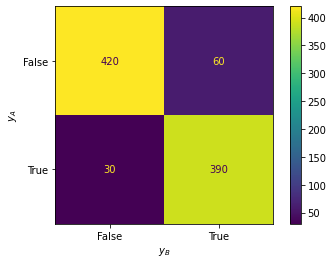

In [7]:
pred_a = clf_a.predict(X)
pred_b = clf_b.predict(X)
cm = confusion_matrix(pred_a, pred_b, labels=clf_a.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_a.classes_)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_ylabel('$y_A$')
ax.set_xlabel('$y_B$')
plt.show()

For 30 instances, A predicts True and B False, whereas for 60 instances A predicts False and B True.